<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; text-align: left; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Jan Attig</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; font-size: 30px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; font-size: 30px; padding:0px;">Übungsblatt 4</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; font-size: 20px; padding:0px; margin-bottom: 20px;">Sommersemester 2020</h3>
<hr>

**Website** [http://www.thp.uni-koeln.de/trebst/Lectures/2020-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2020-CompPhys.shtml)

**Abgabe**:  18.5.2020 bis 13:00 Uhr

**Besprechung**:  20.5.2020 - 22.5.2020

**Name**: <font color="red">Bitte geben Sie ihren Namen an</font>

**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; text-align: left; font-size: 25px; font-weight: bold; text-decoration: underline">Aufgaben auf Übungsblatt 4</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 15px"></td></tr></table>

- Simpson vs. Trapezregel [6 Punkte]
- **Statistik einer Epidemie** [14 Punkte]
- (Bonus) Zweidimensionale Zelluläre Automaten [10 Bonus-Punkte]


<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; text-align: left; font-size: 25px; font-weight: bold; text-decoration: underline">Statistik einer Epidemie</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 15px">[14 Punkte]</td></tr></table>

Die aktuelle Corona-Pandemie hat die Welt fest im Griff und täglich werden wir im Alltag mit neuen Daten, Kurven und den daraus gewonnenen Erkenntnissen konfrontiert. In dieser Aufgabe wollen wir uns diesen Daten aus einer rein analytischen Perspektive annähern – wir werden dabei Schritte der Datenverarbeitung (wie im aktuellen Video zur Programmiertechnik diese Woche besprochen) und speziell das numerische Differenzieren verrauschter Daten üben (Stoff der Vorlesung der letzten Woche). Sollten Sie dabei die eine oder andere Erkenntnis über die aktuelle pandemische Situation und ihre Bekämpfung lernen ist das ein erfreulicher Nebeneffekt. Wir verweisen zugleich aber auf die vielen anderen Aufarbeitungen des Themas, wenn Sie sich hier weiter vertiefen wollen.


In Deutschland ist die autorative Quelle für Corona-Daten das Robert Koch Institut, kurz [RKI](https://www.rki.de/DE/Home/homepage_node.html), welches tagesaktuelle Daten unter anderem in ihrem sehr informativen [Dashboard](https://corona.rki.de) darstellt.

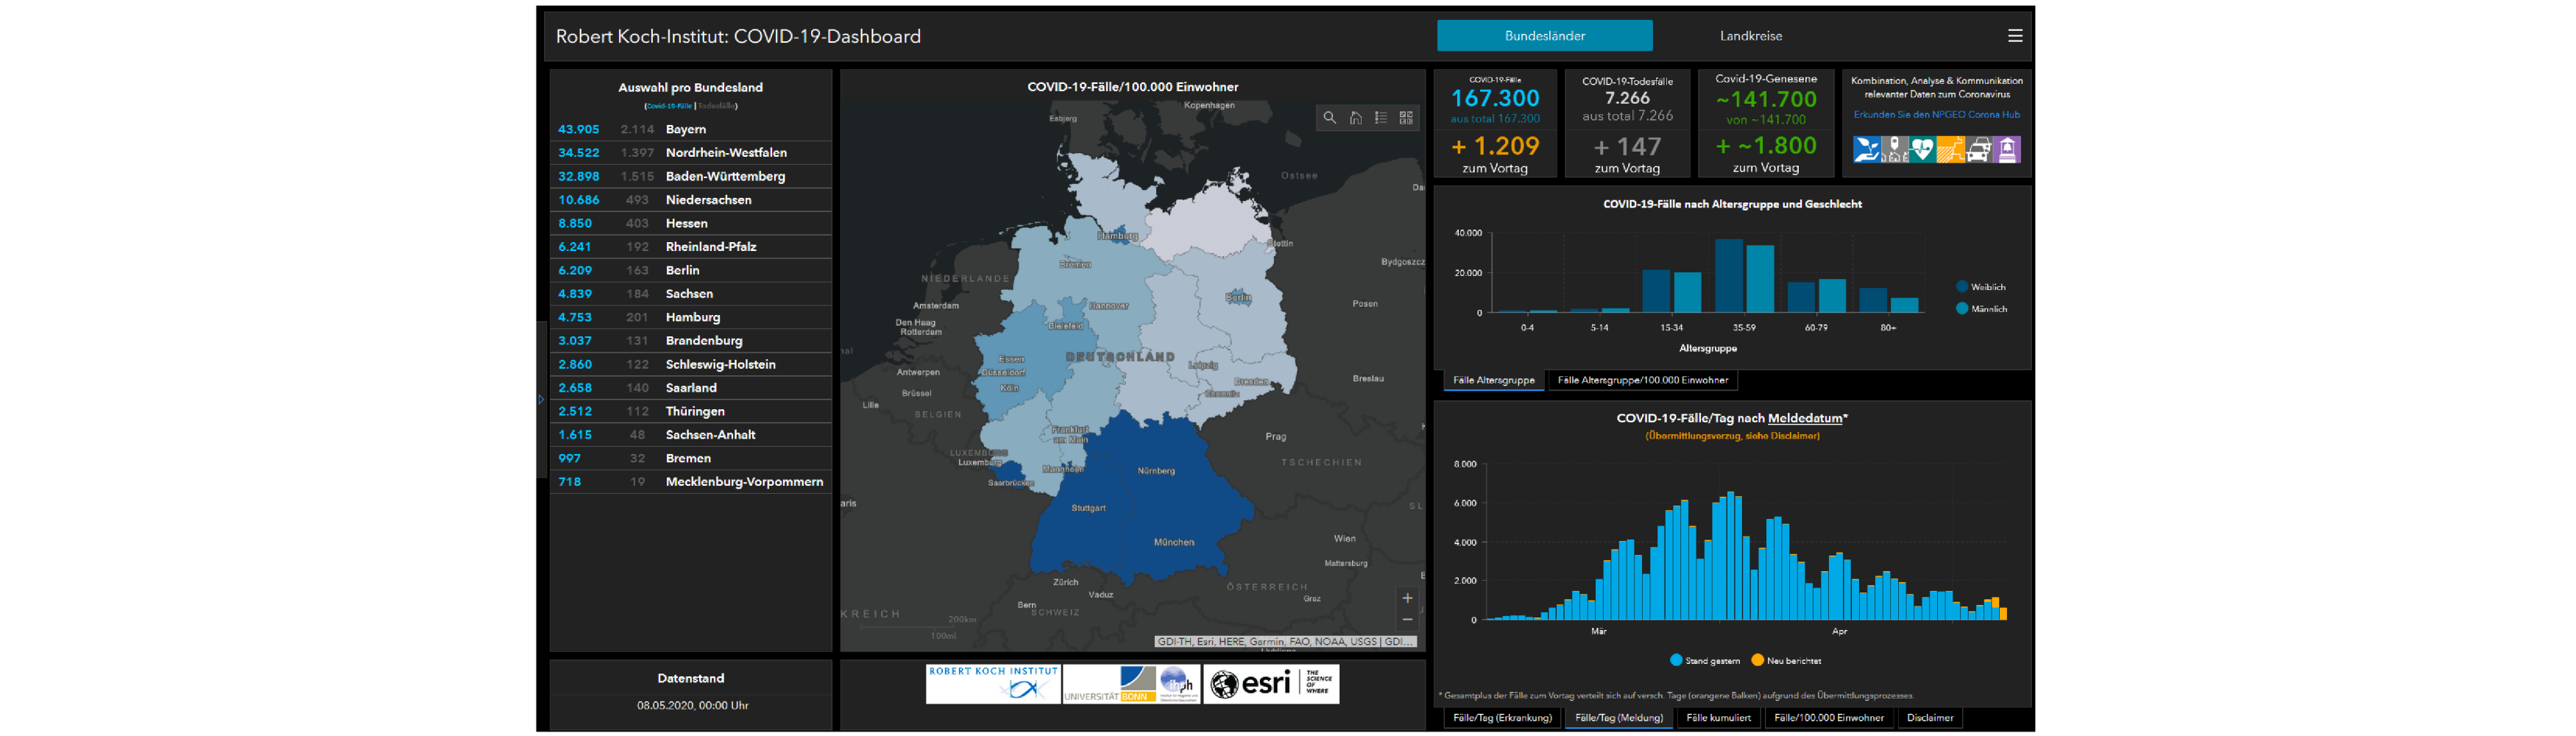

Wir möchten diese Aufgabe nutzen, um im Rahmen der Covid-19 Daten die Themen *Datenverarbeitung* und *Fitten von Daten* sowie *Ableiten von experimentellen Daten* zu diskutieren. Dazu gehen Sie im weiteren Notebook wie folgt vor:
1. Sie werden den **Orginaldatensatz** der Covid-19 Daten des RKI herunterladen und in Ihr Jupyter Notebook einbinden
2. Sie werden **einfache Analysen** auf diesem Datensatz ausführen und **zeitliche Verläufe** der Covid-19 Erkrankung darstellen
3. Sie werden gewonnene Daten **ableiten**, um Aussagen über Änderungen zu treffen
4. Sie werden Covid-19 Daten mit einem Modell **fitten**

## 1. Daten einlesen und aufbereiten

Zuerst wollen wir die Covid-19 Roh-Daten aller Fälle, die dem RKI Dashboard zu Grund liegen, in das Jupyter Notebook einlesen. Sie können den Datensatz des RKI [von dessen Webseite](https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0)
bzw. [hier](https://www.arcgis.com/home/item.html?id=f10774f1c63e40168479a1feb6c7ca74) als `.csv`-Datei herunterladen. Das Einlesen der Daten geschieht dann als `DataFrame` mittels `CSVFiles` and `DataFrames` genau so, wie Sie es in den Programmier-Techniken kennengelernt haben.

Laden Sie zuerst den Datensatz von einer der beiden Quellen herunter und laden Sie ihn dann mittels nachfolgender Zellen in das Jupyter Notebook. Hier wird er dann als Variable `RKI_data_complete` verfügbar sein.

In [ ]:
using CSVFiles
using DataFrames

In [ ]:
RKI_data_complete = DataFrame(load("RKI_COVID19.csv"))

Um sich die Namen aller verfügbaren Spalten im Datensatz anzusehen, können Sie die erste der folgenden Zellen benutzen. Um sich dazu noch alle unterschiedlichen Einträge einer Spalte anzusehen, können Sie die zweite nachfolgende Zelle benutzen. 

Führen Sie beide Zellen aus und erschließen Sie sich, welche Daten in welchen Spalten stehen. Eine Erklärung zu den Einträgen können Sie auch [hier](https://www.arcgis.com/home/item.html?id=f10774f1c63e40168479a1feb6c7ca74) finden.

In [ ]:
sort(propertynames(RKI_data_complete))

In [ ]:
println.(sort(unique(RKI_data_complete.Altersgruppe)));

Mit dem Wissen, welche Daten in welchen Spalten stehen, wollen wir jetzt den Datensatz grob vereinfachen. Dafür wollen wir im Folgenden die Spalten auswählen und in einen neuen Datensatz speichern, die für uns interessante Informationen enthalten. Konkret interessieren uns:
- Datum (sowohl Melde- als auch Referenz-Datum)
- Anzahl der registrierten Fälle, Todesfälle sowie Anzahl der Genesenen
- Altersgruppe
- Geschlecht
- Bundesland (und ggf. Landkreis)

Führen Sie nun die nächste Zelle aus, in dem Sie mittels [`select`](https://juliadata.github.io/DataFrames.jl/stable/lib/functions/#DataFrames.select) den Datensatz zu einem neuen `DataFrame` mit Namen `RKI_data` formatieren, welcher nur noch die gewünschten Spalten enthält. Diesen Datensatz, der als Variable `RKI_data` verfügbar ist, sollen Sie im Folgenden benutzen.

In [ ]:
RKI_data = select(RKI_data_complete, :Meldedatum, :Refdatum, :AnzahlFall, :AnzahlTodesfall, :AnzahlGenesen, :Altersgruppe, :Geschlecht, :Bundesland, :Landkreis)

## 2. Ergebnisse aus den Daten gewinnen

Mit dem vorformatierten Datensatz an der Hand können wir jetzt anfangen Ergebnisse aus dem Datensatz zu erheben und Aussagen abzuleiten. Im Folgenden wollen wir mit vergleichsweise direkten Aussagen beginnen und uns bis zu Zeitreihen von Daten vorarbeiten.

#### 2.a) Direkte Ergebnisse

Bestimmen Sie zuerst durch direkte Operationen auf den Spalten des Datensatzes `RKI_data` die Folgenden Punkte:
- Gesamtzahl aller registrierten Fälle / Todesfälle in Deutschland
- Erstes Referenz- und erstes Melde-Datum eines Falles in Deutschland

#### 2.b) Konditionelle Ergebnisse

Natürlich gibt es auch Aussagen, die das selektieren verschiedener Zeilen voraussetzen, wie z.B. die Anzahl aller Fälle in einem bestimmten Bundesland oder einer bestimmten Altersgruppe. Dies wollen wir im Folgenden näher untersuchen.

Für das selektieren von verschiedenen Spalten können Sie die Funktion `filter` verwenden. Diese hat die Syntax
```
NEUER_DATENSATZ  =  filter( c -> SOLL ZEILE c BEHALTEN WERDEN?,  DATENSATZ )
```
So können Sie z.B. einen Datensatz erstellen, der nur männliche Fälle auflistet:

In [ ]:
RKI_data_male = filter(c -> c.Geschlecht == "M", RKI_data)

Beantworten Sie nun die folgenden Fragen:
- Wie viele registrierte Fälle gibt es bis heute in Bayern?
- Wann wurder der erste Fall in der Altersgruppe `A05-A14` in Sachsen gemeldet?
- Wie viele registrierte Todesfälle gibt es bisher insgesamt in der Altersgruppe `A15-A34` in Deutschland?
- Wie viel Prozent der bisher registrierten Fälle in Deutschland sind noch aktiv (nicht genesen oder gestorben)?
- Was ist die Sterblichkeitsrate aller Altersgruppen gemäß den Zahlen der überstandenen Erkrankungen, d.h. gemäß der den Todesfällen und Genesenen?
- Ist die Sterblichkeitsrate in den Daten unterschiedlich für Männern und Frauen?

#### 2.c) Datenreihen mittels `PyPlot` darstellen

Nachdem Sie bisher gelernt haben, einen Datensatz mittels Spalten- und Zeilen-Auswahl vorzubereiten, möchten wir jetzt im Folgenden den zeitlichen Verlauf bestimmter Messgrößen mittels `PyPlot` visualisieren. Dafür gehen wir wie folgt vor:
0. Ggf. Vorformattieren der Daten (z.B. nur Daten eines Bundeslandes oder einer Altersgruppe auswählen)
1. Extrahieren der verfügbaren Zeitpunkte (Melde- oder Referenz-Datum)
2. Für jeden Zeitpunkt die Messgröße (z.B. Anzahl der gemeldeten Fälle) erfassen
3. Plotten der Messgrößen gegen die Zeitpunkte

Führen Sie zunächst die nachfolgenden Zellen aus und machen Sie sich klar, wie hier der zeitliche Verlauf der täglichen Meldezahlen gegen das Meldedatum durchgeführt wird. Erklären Sie den charakteristischen Verlauf der Kurve!

In [ ]:
using PyPlot
pygui(false)

In [ ]:
# 0. ggf Vorformattieren
data = select(RKI_data, :Meldedatum, :AnzahlFall)

# 1. Extrahieren der verfügbaren Zeitpunkte (Meldedatum)
times = sort(unique(data.Meldedatum))

# 2. Für jeden Zeitpunkt die Messgröße erfassen
cases_all = zeros(length(times))
for i in 1:length(cases_all)
    data_t = filter(c->c.Meldedatum==times[i], data)
    cases_all[i] = sum(data_t.AnzahlFall)
end

# 3. Plotten
figure(figsize=(10,6))
plot(times, cases_all)
xlabel("Meldedatum")
ylabel("An diesem Tag gemeldete Fälle")
title("Täglich gemeldete Fälle nach Meldedatum, Quelle: RKI / NPGEO")
gcf().autofmt_xdate()

Benutzen Sie den oben stehenden Code um den Gesamtverlauf der gemeldeten Fallzahlen in Deutschland separat für Männer und Frauen gegen das Meldedatum aufzutragen. 

Vergleichen Sie jetzt den zeitlichen Verlauf der täglich gemeldeten Fälle in Bayern mit denen in Nordrhein-Westfalen.

## 3. Ableiten von gegebenen Daten

Im Folgenden wollen wir die Covid-19 Daten nutzen, um ein Ihnen bekanntes Thema aus der Vorlesung aufzugreifen - das Ableiten / Differenzieren von vorgegebenen Daten. Konkret wollen wir den Verlauf der Gesamtanzahl aller Covid-19 Fälle gegen das zugehörige Meldedatum untersuchen, welches zuerst einmal in der nachfolgenden Zelle erstellt und geplottet wird:

In [ ]:
# 0. Vorformattieren (nicht nötig)
data = RKI_data

# 1. Extrahieren der Zeitpunkte (Meldedatum)
times = sort(unique(data.Meldedatum))

# 2. Für jeden Zeitpunkt die Messgröße erfassen
cases_total = [sum(filter(c->c.Meldedatum<=t, data).AnzahlFall) for t in times]

# 3. Plotten
figure(figsize=(10,6))
plot(times, cases_total)
xlabel("Zeit")
ylabel("# Fälle bis Datum")
title("Gesamtzahl der Fälle nach Meldedatum, Quelle: RKI / NPGEO")
gcf().autofmt_xdate()

Um mit den Daten zu arbeiten, müssen Sie zuerst allerdings zuerst in Zeitreihen aus `Float64` x- und y-Werten umgewandelt werden (bisher sind die x-Werte noch `Date` Objekte in Julia). Dazu wird das Paket `Dates` benutzt.

Führen Sie zur Konvertierung die nachfolgenden Zellen aus und machen Sie sich klar, wie die Daten in Zahlenwerte umgewandelt werden.

In [ ]:
using Dates

In [ ]:
x_values = Dates.days.(times .- Dates.now());
y_values = cases_total;

In [ ]:
figure(figsize=(10,6))
plot(x_values, y_values, ".-")
xlabel("Zeit [Tagen bis heute]")
ylabel("Anzahl bekannte Fälle")

#### 3.a) Einfache Ableitungen bilden

Jetzt wollen wir uns mit dem eigentlichen numerischen Ableiten der Daten beschäftigen.
Sie haben in der Vorlesung gelernt, dass die einfachste Methode um Daten numerisch abzuleiten ist, den zentralen Differenzenquotienten zu bilden:

$\quad f^\prime(x_i) \approx \frac{y_{i+1}-y_{i-1}}{x_{i+1}-x_{i-1}}$,

wobei wir $y_i\equiv f(x_i)$ definiert haben.

Leiten Sie gemäß dieser Vorschrift die numerischen Daten in den Arrays `x_values` und `y_values` ab und plotten Sie die von Ihnen berechnete Ableitung. Plotten Sie dazu die Kurve der täglich gemeldeten Fälle und beschreiben Sie, wie beide Kurven zusammenhängen.

#### 3.b) Lokale Tangente als Ableitung

Sie werden bemerkt haben, dass der grobe Trend der Ableitung durch ein leichtes Rauschen in den erhobenen Daten stark gestört wird. Um die Daten daher besser analysieren zu können, erinnern wir uns daran, dass die Ableitung einer Funktion letztendlich nichts anderes als eine lokale lineare Approximation ist. Wir können also die Ableitung berechnen, indem wir an jeden Punkt eine Tangente anlegen. Diese berechnen wir mittels linearer Regression. Die Tangente an Punkt $x_i$ ist gegeben durch
$y=b_i \cdot x + a_i,$
wobei hier die Steigung $b_i$ schon die Ableitung am Punkt $x_i$ ist. Diese Steigung $b_i$ ergibt sich aus:

$\quad b_i = \frac{\sum_{j=i-n}^{i+n}\left(x_j-\bar{x}_i\right)\left(y_j-\bar{y}_i\right)}{\sum_{j=i-n}^{i+n}\left(x_j - \bar{x}_i\right)^2}.$

Die Mittelwerte sind definiert durch

$\quad \bar{x}_i = \frac{1}{2n+1}\sum\limits_{j=i-n}^{i+n} x_j, \qquad \bar{y}_i = \frac{1}{2n+1}\sum\limits_{j=i-n}^{i+n} y_j.$

Implementieren Sie die lokale Approximation und plotten Sie dann die Ableitung der vorherigen Daten in den Arrays `x_values` und `y_values` für die Fälle $n={1, 3, 7, 14}$. Bewerten Sie die Brauchbarkeit ihres Ergebnisses und erklären Sie welche Probleme man beachten muss.

## 4. Fitten von Daten

In diesem letzten Abschnitt möchten wir den Anfang der Kurve aller gemeldeten Fälle in Deutschland mit einer Exponentialfunktion fitten. Gerade in der Anfangsphase der Epidemie vor dem Social Distancing wurde viel darüber diskutiert, dass die Fallzahlen exponentiell steigen und hier möchten wir genau auf diesen Aspekt zurückkommen.

Zum Fitten verwenden wir analog zu den Programmiertechniken das Paket `LsqFit` und fitten mittels `curve_fit`.

Fitten Sie im Folgenden einen *relevanten Bereich* der beschriebenen Kurve (die Daten befinden sich noch in den Arrays `x_values` und `y_values`) mit dem Modell $ N(t) = \exp(\alpha * (t-t_0))$ wobei $N(t)$ die Gesamtzahl der registrierten Fälle zur Zeit $t$ beschreibt und $\alpha$ und $t_0$ Fit-Parameter sein sollen, die den zeitlichen Ausbruch der Epidemie beschreiben. Plotten Sie Ihren Fit mit den Daten und geben Sie Ihren Fit-Bereich an. Wann wäre die Bevölkerung komplett mit dem Virus befallen, sofern der exponentielle Anstieg ungebremst weiterverlaufen wäre?